In [1]:
"""
Magic commands
"""
%matplotlib inline
%load_ext autoreload
%autoreload 2

"""
Python standard packages
"""
import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

"""
Own packages
"""
sys.path.insert(0, "C:\\code\\speciale\\") # vesl path
sys.path.insert(0, "C:\\Users\\lucas\\OneDrive\\Skrivebord\\repo\\speciale\\") # ljb path

from market_simulation_study.agents import RandomAgent, InvestorAgent, TrendAgent
from market_simulation_study.environment import MarketEnvironment


# Simulation 


## Setup

In [15]:
# Declare parameters
n_random_agents= 30
n_investor_agents = 5
n_trend_agents = 10

n_agents = n_random_agents + n_investor_agents + n_trend_agents


time_periods = 3000

price_list = [100 + np.random.normal() for j in range(100)]
ex_list = np.array([[0]*n_agents, [0]*n_agents])
fee = 0
mean_buy_price = 99
mean_sell_price = 101

state0 = {"market_prices": price_list, "execution_status": ex_list, 'fee':fee, "mean_buy_price":mean_buy_price,
          "mean_sell_price":mean_sell_price}

env = MarketEnvironment(state0)
agents = []

random_agents = [RandomAgent(agent_id = j,
                             latency = np.random.normal()) for j in range(n_random_agents)]

investor_agents = [InvestorAgent(agent_id = j + n_random_agents,
                                 latency = np.random.normal(),
                                 intensity = 0.1) for j in range(n_investor_agents)]

trend_agents = [TrendAgent(agent_id = j + n_random_agents + n_investor_agents,
                                 latency = np.random.normal()) for j in range(n_trend_agents)]

agents.append(random_agents)
agents.append(investor_agents)
agents.append(trend_agents)

agents = [item for sublist in agents for item in sublist]

# Initialize agents
for j in range(n_agents):
        agents[j].update(state0)

## Run simulation

In [16]:
#fig, ax = plt.subplots(figsize = (12, 6))
#plot_data = pd.DataFrame({"time": None, "pnl": None, "agent_id": None}, index = [0])
for time in range(time_periods):
    state = env.step(agents)
    for j in range(n_agents):
        agents[j].update(state)
        #agents[j].calculate_profit_and_loss(state)
        #ax.scatter(time, agents[j].pnl)
        
    

# Performance overview

229.45811990826314

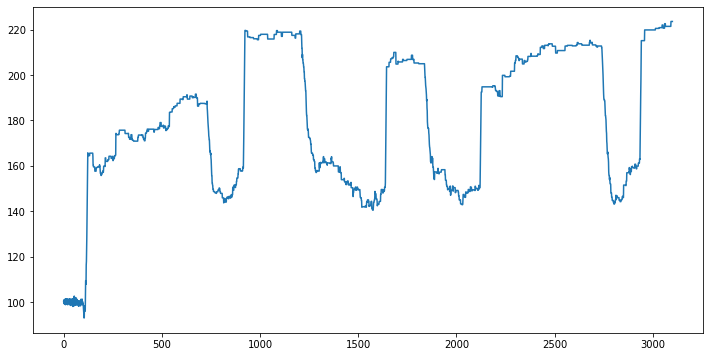

In [17]:
fig, ax = plt.subplots(figsize = (12, 6))
ax.plot(state['market_prices'])
np.maximum(agents[0].sell_price, 0)

In [24]:
stats_df[stats_df["class"] == "Random"]["PNL"].sum()

-678.1687093904435

In [25]:
stats_df[stats_df["class"] == "Investor"]["PNL"].sum()

3307.255405963805

In [26]:
stats_df[stats_df["class"] == "Investor"]["Position"].sum()

98.0

In [27]:
stats_df[stats_df["class"] == "Random"]["Position"].sum()

0.0

In [18]:
stats_df = pd.DataFrame({"id":None, "class":None, "Position":None, "PNL":None}, index = [0]).dropna()
for agent in agents:
    agent.calculate_profit_and_loss(state)
    df_temp = pd.DataFrame({"id": agent.agent_id,
                            "class":agent.agent_class, 
                            "Position":agent.position, 
                            "PNL": agent.pnl, 
                            "latency": agent.latency},
                            index = [agent.agent_id])
    stats_df = stats_df.append(df_temp)

print("PNL SUM: ", stats_df["PNL"].sum())
print("POS SUM: ", stats_df["Position"].sum())
stats_df.sort_values("latency", inplace = True)
np.corrcoef(stats_df.PNL.values, stats_df.latency.values)
display(stats_df)
display(stats_df.groupby("class")["PNL"].mean())

PNL SUM:  224.78410222173034
POS SUM:  0.0


,id,class,Position,PNL,latency
34,34,Investor,20.0,2299.242492,-2.343118
27,27,Random,16.0,885.488872,-1.616844
18,18,Random,-3.0,-573.235032,-1.232137
23,23,Random,-16.0,-1081.703545,-0.974745
20,20,Random,8.0,751.001744,-0.862340
15,15,Random,-13.0,-1125.215274,-0.711526
36,36,Trend,5.0,1561.275737,-0.686854
35,35,Trend,5.0,1270.195349,-0.655399
33,33,Investor,20.0,2511.583850,-0.624575
41,41,Trend,5.0,995.923700,-0.614276


class
Investor    2192.138843
Random      -385.707510
Trend         83.531519
Name: PNL, dtype: float64